In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
df_elo = pd.read_csv("metric_data.csv", parse_dates=["date"])
df_elo_adj = pd.read_csv("metric_data_adjusted.csv", parse_dates=["date"])
df_ts = pd.read_csv("metric_data_trueskill.csv", parse_dates=["date"])

(0.0, 0.8)

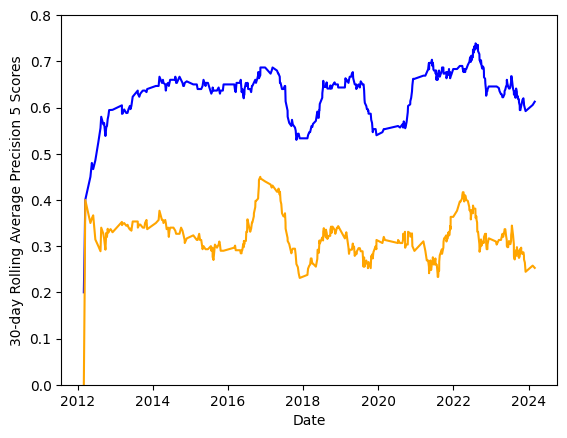

In [13]:
ax = sns.lineplot(
    data=df_elo_adj[
        (df_elo_adj["organization"] == "ifbb")
        & (df_elo_adj["division"] == "bikini")
        & (df_elo_adj["class"] == "open")
    ],
    x="date",
    y="30dayrollavg_prec_5_score",
    color="blue"
)
ax2 = sns.lineplot(
    data=df_elo_adj[
        (df_elo_adj["organization"] == "ifbb")
        & (df_elo_adj["division"] == "bikini")
        & (df_elo_adj["class"] == "open")
    ],
    x="date",
    y="30dayrollavg_prec_5_score_random",
    color="orange"
)
plt.xlabel("Date")
plt.ylabel("30-day Rolling Average Precision 5 Scores")
plt.ylim(0, 0.8)
# plt.axhline(0.05, color='green')
# sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

(0.0, 0.8)

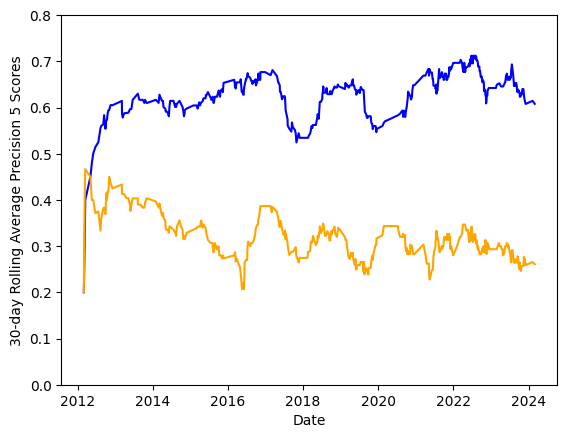

In [14]:
ax = sns.lineplot(
    data=df_elo[
        (df_elo["organization"] == "ifbb")
        & (df_elo["division"] == "bikini")
        & (df_elo["class"] == "open")
    ],
    x="date",
    y="30dayrollavg_prec_5_score",
    color="blue"
)
ax2 = sns.lineplot(
    data=df_elo[
        (df_elo["organization"] == "ifbb")
        & (df_elo["division"] == "bikini")
        & (df_elo["class"] == "open")
    ],
    x="date",
    y="30dayrollavg_prec_5_score_random",
    color="orange"
)
plt.xlabel("Date")
plt.ylabel("30-day Rolling Average Precision 5 Scores")
plt.ylim(0, 0.8)
# plt.axhline(0.05, color='green')
# sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

(0.0, 0.8)

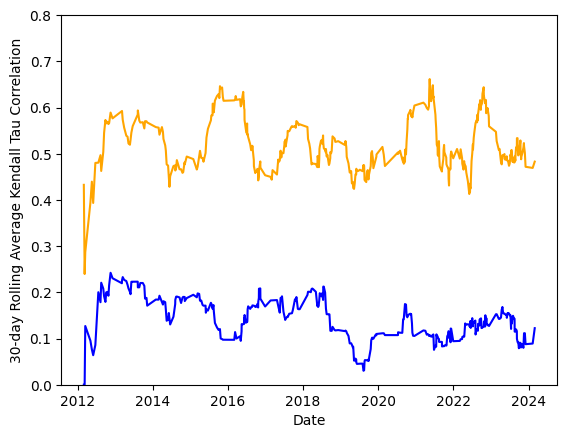

In [19]:
ax = sns.lineplot(
    data=df_ts[
        (df_ts["organization"] == "ifbb")
        & (df_ts["division"] == "bikini")
        & (df_ts["class"] == "open")
    ],
    x="date",
    y="30dayrollavg_kt_pvalue",
    color="blue"
)
ax2 = sns.lineplot(
    data=df_ts[
        (df_ts["organization"] == "ifbb")
        & (df_ts["division"] == "bikini")
        & (df_ts["class"] == "open")
    ],
    x="date",
    y="30dayrollavg_kt_pvalue_random",
    color="orange"
)
plt.xlabel("Date")
plt.ylabel("30-day Rolling Average Kendall Tau Correlation")
plt.ylim(0, 0.8)
# plt.axhline(0.05, color='green')
# sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

In [41]:
# quantify uncertainty in the ranking
df_ts["date"].unique()

<DatetimeArray>
['2012-02-18 00:00:00', '2012-03-02 00:00:00', '2012-03-16 00:00:00',
 '2012-05-05 00:00:00', '2012-06-01 00:00:00', '2012-09-07 00:00:00',
 '2012-09-28 00:00:00', '2012-10-13 00:00:00', '2012-10-20 00:00:00',
 '2012-12-06 00:00:00',
 ...
 '2020-07-02 00:00:00', '2020-07-23 00:00:00', '2021-04-01 00:00:00',
 '2020-04-02 00:00:00', '2020-04-21 00:00:00', '2020-05-19 00:00:00',
 '2021-03-23 00:00:00', '2022-08-20 00:00:00', '2024-03-10 00:00:00',
 '2020-09-18 00:00:00']
Length: 2085, dtype: datetime64[ns]

In [29]:
df = pd.read_csv("contest_results_trueskill.csv")

In [39]:
df[df["contest_date"] == "2023-06-24"]

,Unnamed: 0,organization,contest_name,contest_date,division,class,competitor_name,placing,trueskill_rating,trueskill_rank
687253,657157,npc,npc branch warren classic,2023-06-24,bikini,class a,ashley zamora,1.0,21.504804,4.0
687254,657156,npc,npc branch warren classic,2023-06-24,bikini,class a,maria martinez lopez,2.0,23.784664,3.0
687255,657155,npc,npc branch warren classic,2023-06-24,bikini,class a,serena lewis,3.0,25.000000,1.0
687256,657154,npc,npc branch warren classic,2023-06-24,bikini,class a,lacy cook,4.0,25.000000,2.0
687257,657159,npc,npc branch warren classic,2023-06-24,bikini,class b,nicole mcclung,1.0,25.000000,1.0
...,...,...,...,...,...,...,...,...,...,...
688772,758624,npcw,npc worldwide sheru classic italian championsh...,2023-06-24,wellness,true novice,sara angeletti,2.0,25.000000,2.0
688773,758599,npcw,npc worldwide sheru classic italian championsh...,2023-06-24,women's physique,class a,tiziana munerol,1.0,28.267136,2.0
688774,758598,npcw,npc worldwide sheru classic italian championsh...,2023-06-24,women's physique,class a,nicole vertaglio,2.0,28.458391,1.0
688775,758597,npcw,npc worldwide sheru classic italian championsh...,2023-06-24,women's physique,class a,franziska donath,3.0,21.063227,3.0
